In [310]:
import math
from sympy import *
init_printing(use_unicode=True)
x, y, z, l =symbols('x y z l')

In [311]:
from icecream import ic
import random

In [312]:
def getPlots(funcsWithPlotParameters, title, rangeX=(-5, 5)):
    plots = plot(show=False, xlabel='x', ylabel='y', legend=True, title=title)
    for fp in funcsWithPlotParameters:
        func = fp.get('func', None)
        if func:
            color = fp.get('color', 'blue')
            label = fp.get('label', '')
            p = plot(func, (x, rangeX[0], rangeX[1]), show=False, line_color=color, label=label)
            plots.append(p[0])
    plots.show()
    return plots

In [313]:
def t1(func, Nn, x0):
    ic(func, Nn, x0)
    skladowe = []
    szeregTaylora = 0
    for n in range(1, Nn+1):
        pochodna = diff(func, x, n)
        pochodnaX = pochodna.subs(x, x0)
        skladowa = pochodnaX / math.factorial(n) * ((x - x0)**n)
        ic(pochodna, pochodnaX, skladowa)
        skladowe.append(skladowa)
        szeregTaylora += skladowa
    # Pierwszy układ wykresów - wykres funkcji i jej N-tego przybliżenia
    wykresFunkcjiOrazTaylora = getPlots([{'func':func, 'color':"blue", 'label':"f(x)"},
                                     {'func':szeregTaylora, 'color':"red", 'label':"taylor"}],
                                    "Wykres funkcji i jej N-tego przyblizenia", (x0-5, x0+5))
    # Drugi układ wykresów - wykres tailora i wszystkich składowych
    taylorPlotData = [{'func': szeregTaylora, 'color': "red", 'label': "taylor"}]  # Dodanie danych wykresu Taylora
    for i, skladowa in enumerate(skladowe):
        if skladowa:
            randomColor = '#' + ''.join([random.choice('123456789ABCDE') for j in range(6)])
            taylorPlotData.extend([{'func': skladowa, 'color': randomColor, 'label': f"a{i+1}"}])
    #taylorPlotData.extend([{'func': skladowa, 'color': "green", 'label': f"skladowa_{i+1}"} for i, skladowa in enumerate(skladowe)])  # Dodanie danych wykresow składowych
    wykresTayloraOrazSkladowych = getPlots(taylorPlotData, "Wykres taylora oraz wykresy jego skladowych", (x0-5, x0+5))
    return [s for s in skladowe if s != 0], szeregTaylora, wykresFunkcjiOrazTaylora, wykresTayloraOrazSkladowych

ic| func: sin(x), Nn: 15, x0: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: -cos(x), pochodnaX: -1, skladowa: -x**3/6
ic| pochodna: sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x**5/120
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: -cos(x), pochodnaX: -1, skladowa: -x**7/5040
ic| pochodna: sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x**9/362880
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: -cos(x), pochodnaX: -1, skladowa: -x**11/39916800
ic| pochodna: sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: cos(x), pochodnaX: 1, skladowa: x**13/6227020800
ic| pochodna: -sin(x), pochodnaX: 0, skladowa: 0
ic| pochodna: -cos(x), pochodnaX: -1, skladowa: -x**15/1307674368000


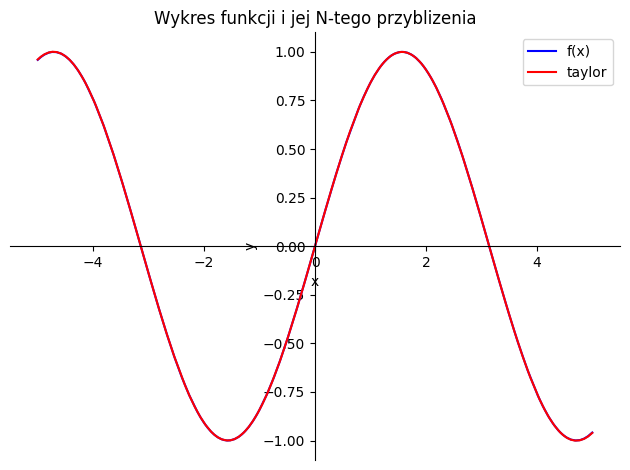

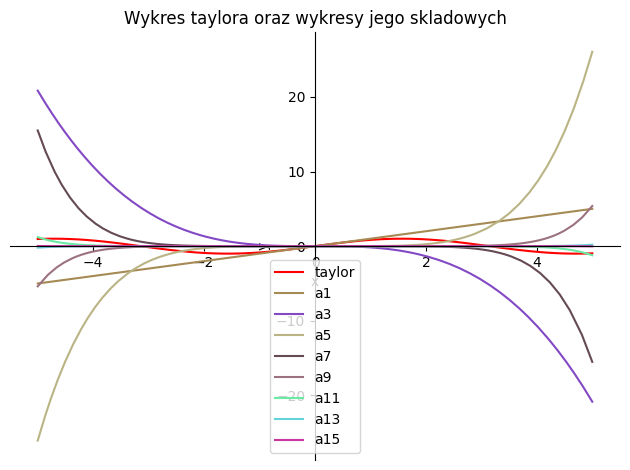

[x, -x**3/6, x**5/120, -x**7/5040, x**9/362880, -x**11/39916800, x**13/6227020800, -x**15/1307674368000]
-x**15/1307674368000 + x**13/6227020800 - x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


In [314]:
t1Func = sin(x)
w1, w2, w3, w4 = t1(t1Func, 15, 0)
print(w1)
print(w2)